In [1]:
import numpy as np
from scipy.special import jv
import matplotlib.pyplot as plt
import seaborn as sns

from qpkr import QPKR

In [2]:
def get_unitary(kappa: float, hbar: float, tau: float, n: int, basis: int) -> float:
    """Returns the (0,0) or the (n/2, n/2) element of the unitary operator of a QKR
    kappa: distribution of kicking strength
    hbar: effective planck's contant
    tau: measurement time (multiple after kicking)
    n: number of kicks"""
    return np.exp(-1j * hbar * n * basis ** 2 / 8) * jv(0, 2 * kappa * n * tau)


def decorate_plot(ax):
    sns.set_theme(style="ticks")
    ax.minorticks_on()
    ax.tick_params(direction="in", right=True, top=True)
    ax.tick_params(labelsize=18)
    ax.tick_params(labelbottom=True, labeltop=False, labelright=False)
    ax.tick_params(direction="in", which="minor", length=5, bottom=True)
    ax.tick_params(direction="in", which="major", length=10, bottom=True)
    ax.grid()
    return ax

def get_QKR_first_hittingtime(k_mu, k_sigma, tau, hbar, basis, timesteps):
    """Given the hitting strength and measurement interval
    compute the amplitude of first detection and first hitting time
    distribution"""
    kappa = np.random.randn(timesteps) * k_sigma + k_mu
    unitaries = np.array(
        [
            get_unitary(k_i, hbar, tau, n_i, basis)
            for (k_i, n_i) in zip(kappa, range(timesteps))
        ]
    )
    psi = np.ones(timesteps)

    for i in range(timesteps):
        psi[i] = unitaries[i] - sum([unitaries[i - j] * psi[j] for j in range(i - 1)])

    return psi, np.abs(psi) ** 2

/home/asr/miniconda3/envs/sem8proj/lib/python3.7/site-packages/ipykernel_launcher.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
/home/asr/miniconda3/envs/sem8proj/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10
/home/asr/miniconda3/envs/sem8proj/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10


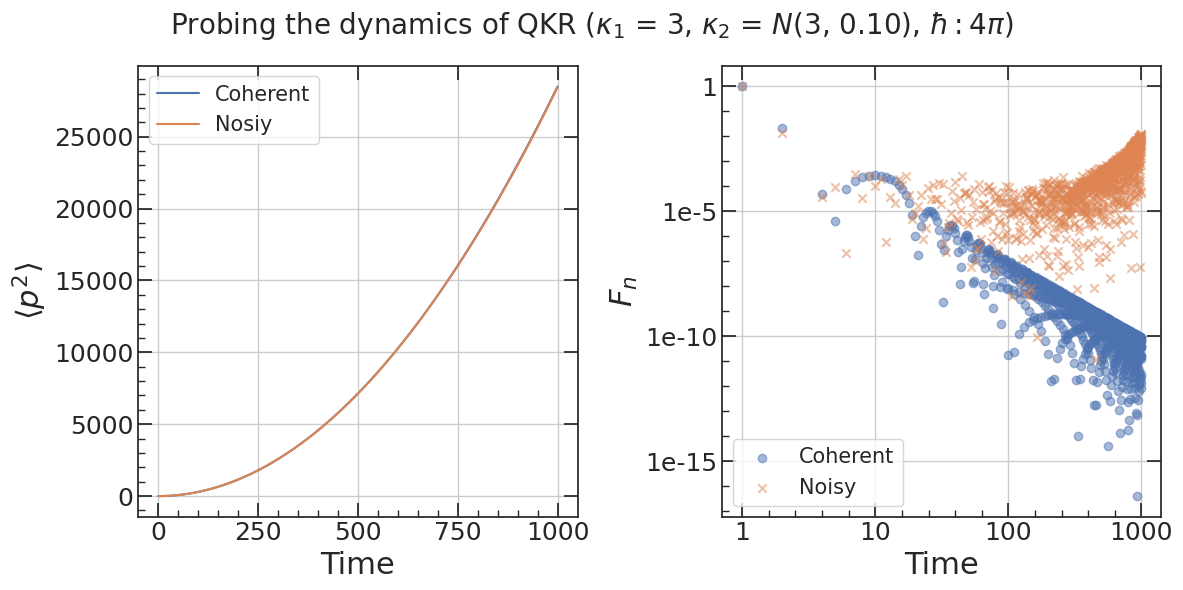

In [16]:
# Probe evolution at resonance (noisy vs coherent)

basis_size = pow(2,9)
total_time = 1000

k_mu1 = 3; k_sigma1=1e-01; hbar1=4*np.pi; tau=1

params1 = [k_mu1, hbar1, 0, 0, 0, 0, 0]
qpkr1 = QPKR(basis_size, total_time, params1)
qpkr1_copy = QPKR(basis_size, total_time, params1)



p2_coherent, psi_t_coherant = qpkr1.evolve(form="QPKR")
p2_noisy, psi_t_noisy = qpkr1_copy.evolve("random", k_sigma1)

# FDTD
psi_coherent, F_coherent = get_QKR_first_hittingtime(k_mu1, 0, tau, hbar1, basis_size, total_time)
psi_noisy, F_noisy = get_QKR_first_hittingtime(k_mu1, k_sigma1, tau, hbar1, basis_size, total_time)


fig, axes = plt.subplots(1,2, figsize=(12,6))

for ax in axes:
    decorate_plot(ax)
    
axes[0].plot(p2_coherent, label="Coherent")
axes[0].plot(p2_noisy, label="Nosiy")
axes[0].legend(fontsize=15)
axes[0].set_xlabel("Time", fontsize=22)
axes[0].set_ylabel(r"$\langle p^2 \rangle$", fontsize=22)



axes[1].scatter(np.log10(np.arange(1, total_time+1)),
                np.log10(F_coherent), marker='o',
                label="Coherent", alpha=0.5)

axes[1].scatter(np.log10(np.arange(1, total_time+1)),
                np.log10(F_noisy), marker='x',
                label="Noisy", alpha=0.5)

# Set xticks and yticks
axes[1].set(xticks=[0, 1, 2, 3], yticks=[-15, -10, -5, 0])
axes[1].set_xticklabels(["1", "10", "100", "1000"])
axes[1].set_yticklabels(["1e-15", "1e-10", "1e-5", "1"])
axes[1].set_xlabel("Time", fontsize=22)
axes[1].set_ylabel(r"$F_n$", fontsize=22)


axes[1].legend(fontsize=15)

plt.suptitle("Probing the dynamics of QKR ($\kappa_1$ = %d, $\kappa_2$ = $N$(%d, %.2f), $\hbar:4\pi$)"%
             (k_mu1, k_mu1, k_sigma1), fontsize=20)


    
plt.tight_layout()
# plt.savefig("FDTD_dynamics_resonance.png",
#            dpi=300, bbox_inches='tight')
plt.show()



/home/asr/miniconda3/envs/sem8proj/lib/python3.7/site-packages/ipykernel_launcher.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
/home/asr/miniconda3/envs/sem8proj/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/home/asr/miniconda3/envs/sem8proj/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


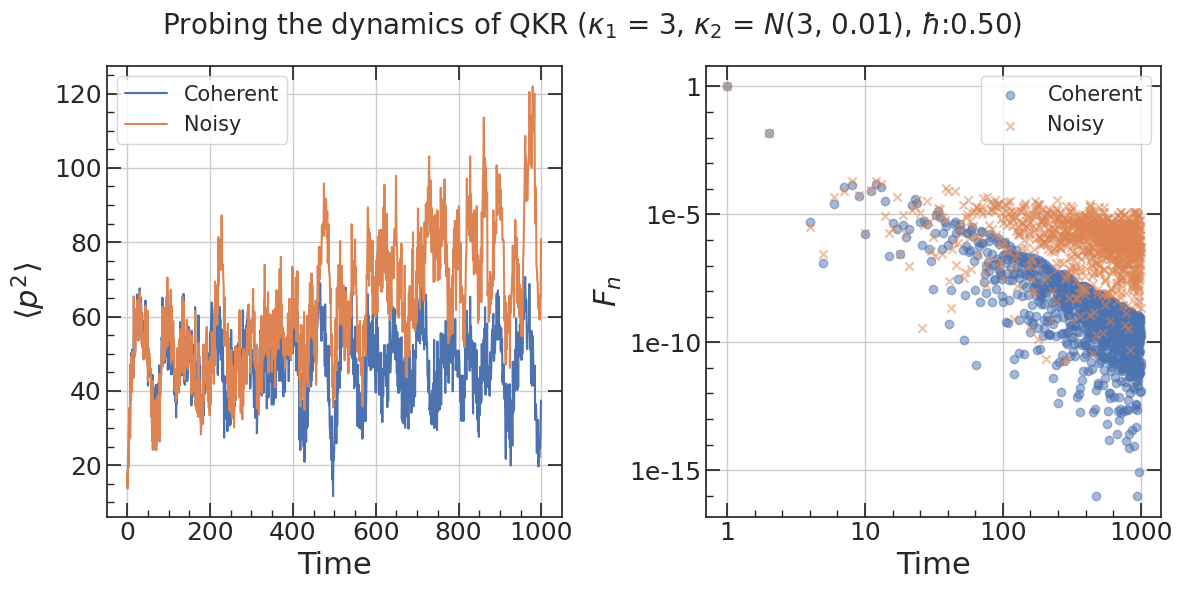

In [15]:
# Probe evolution off-resonance (noisy vs coherent)

basis_size = pow(2,9)
total_time = 1000

k_mu2 = 3; k_sigma2 = 1.5e-02
hbar2 = 0.5; tau=1
params2 = [k_mu2, hbar2, 0, 0, 0, 0, 0]
qpkr2 = QPKR(basis_size, total_time, params2)

p2_coherent, psi_t_coherant = qpkr2.evolve(form="QPKR")
p2_noisy, psi_t_noisy = qpkr2.evolve("random", k_sigma2)

# FDTD
psi_coherent, F_coherent = get_QKR_first_hittingtime(k_mu2, 0, tau, hbar2, basis_size, total_time)
psi_noisy, F_noisy = get_QKR_first_hittingtime(k_mu2, k_sigma2, tau, hbar2, basis_size, total_time)


fig, axes = plt.subplots(1,2, figsize=(12,6))
axes[0].plot(p2_coherent, label="Coherent")
axes[0].plot(p2_noisy, label="Noisy")
axes[0].set_xlabel("Time", fontsize=22)
axes[0].set_ylabel(r"$\langle p^2 \rangle$", fontsize=22)
axes[0].legend(fontsize=15)

axes[1].scatter(np.log10(np.arange(1, total_time+1)), np.log10(F_coherent),
             marker='o', label="Coherent", alpha=0.5)

axes[1].scatter(np.log10(np.arange(1, total_time+1)), np.log10(F_noisy),
             marker='x', label="Noisy", alpha=0.5)


# Set xticks and yticks
axes[1].set(xticks=[0, 1, 2, 3], yticks=[-15, -10, -5, 0])
axes[1].set_xticklabels(["1", "10", "100", "1000"])
axes[1].set_yticklabels(["1e-15", "1e-10", "1e-5", "1"])
axes[1].set_xlabel("Time", fontsize=22)
axes[1].set_ylabel(r"$F_n$", fontsize=22)
axes[1].legend(fontsize=15)

plt.suptitle("Probing the dynamics of QKR ($\kappa_1$ = %d, $\kappa_2$ = $N$(%d, %.2f), $\hbar$:%.2f)"%
             (k_mu2, k_mu2, k_sigma2, hbar2), fontsize=20)

for ax in axes:
    decorate_plot(ax)
    
plt.tight_layout()
# plt.savefig("FDTD_dynamics_nonresonance_h_05.png",
#            dpi=300, bbox_inches='tight')
plt.show()


/home/asr/miniconda3/envs/sem8proj/lib/python3.7/site-packages/ipykernel_launcher.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
/home/asr/miniconda3/envs/sem8proj/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/home/asr/miniconda3/envs/sem8proj/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10


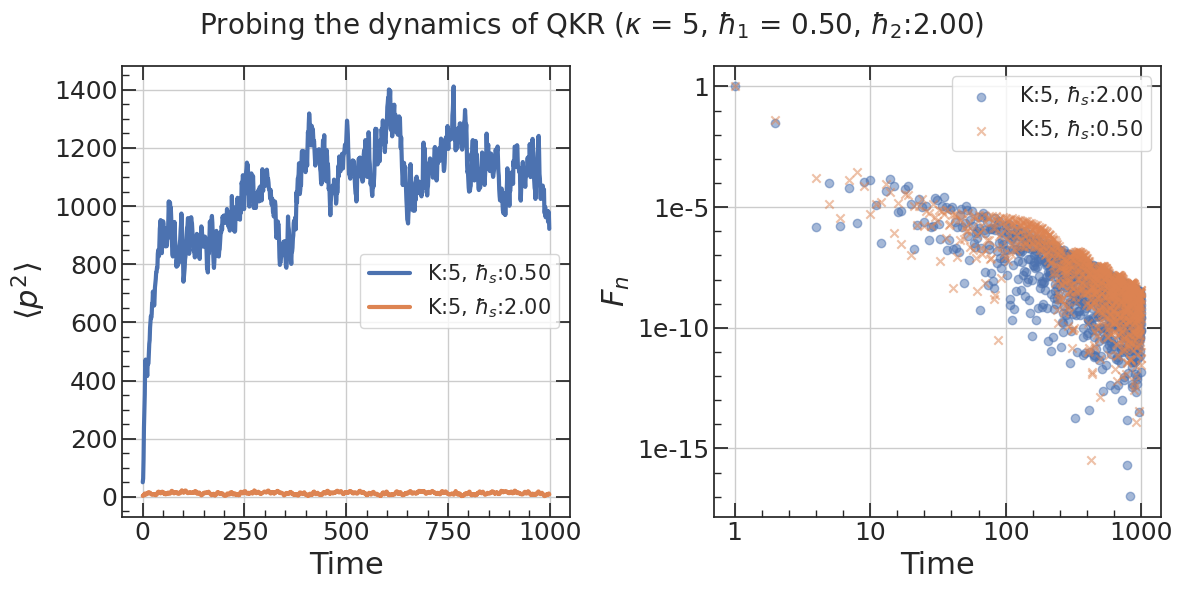

In [14]:
# Different coherent dynamics

basis_size = pow(2,9)
total_time = 1000

k_mu = 5; hbar = [0.5, 2]
tau=1

params = [[k_mu,h, 0,0,0,0,0] for h in hbar]

qpkr_objs = [QPKR(basis_size, total_time, p) for p in params]

p2 = np.array([kicked_rotor.evolve(form="QPKR")[0] for kicked_rotor in qpkr_objs])
FDTD = [get_QKR_first_hittingtime(k_mu, 0, tau, h, basis_size, total_time)[1] for h in hbar]

fig, axes = plt.subplots(1,2, figsize=(12,6))
axes[0].plot(p2[0], lw=3, label="K:%d, $\hbar_s$:%.2f"%(k_mu, hbar[0]))
axes[0].plot(p2[1], lw=3, label="K:%d, $\hbar_s$:%.2f"%(k_mu, hbar[1]))
axes[0].set_xlabel("Time", fontsize=22)
axes[0].set_ylabel(r"$\langle p^2 \rangle$", fontsize=22)
axes[0].legend(fontsize=15)


# FDTD

axes[1].scatter(np.log10(np.arange(1, total_time+1)), np.log10(FDTD[1]),
              label="K:%d, $\hbar_s$:%.2f"%(k_mu, hbar[1]), alpha=0.5)
axes[1].scatter(np.log10(np.arange(1, total_time+1)), np.log10(FDTD[0]),
              marker='x', label="K:%d, $\hbar_s$:%.2f"%(k_mu, hbar[0]), alpha=0.5)


# Set xticks and yticks
axes[1].set(xticks=[0, 1, 2, 3], yticks=[-15, -10, -5, 0])
axes[1].set_xticklabels(["1", "10", "100", "1000"])
axes[1].set_yticklabels(["1e-15", "1e-10", "1e-5", "1"])
axes[1].set_xlabel("Time", fontsize=22)
axes[1].set_ylabel(r"$F_n$", fontsize=22)
axes[1].legend(fontsize=15)

plt.suptitle("Probing the dynamics of QKR ($\kappa$ = %d, $\hbar_1$ = %.2f, $\hbar_2$:%.2f)"%
             (k_mu, hbar[0], hbar[1]), fontsize=20)

for ax in axes:
    decorate_plot(ax)
    
plt.tight_layout()
# plt.savefig("FDTD_dynamics_probe.png",
#            dpi=300, bbox_inches='tight')
plt.show()
